<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Sklearn_Decision_Tree_Multiple_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Data Preperation

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

In [7]:
X = df.values

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Decision Tree Regression

In [10]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

## Result

In [16]:
print('MSE Train: {:.4f}, Test: {:.4f}'.format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE Train: 15.3680, Test: 19.1073


In [18]:
print('R2 Train: {:.4f}, Test: {:.4f}'.format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R2 Train: 0.8252, Test: 0.7436


## Feature Importance

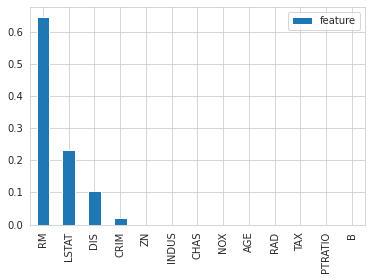

In [21]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');